# Grabbing posters and genres from movies (TMDb API pull)

The code to grab things from the TMDb API is in `src/tmdb.py`. 

### Configuration: Getting API keys
1. Follow the steps in the [TMDb API docs](https://developers.themoviedb.org/3/getting-started) to get a key.
2. Once you have a key, your `keys.ini` file should be in `[CS109B project file path]/config/`. It needs to look like this:

```
[TMDb]
key:(your key)
key_v4:(your version 4 key - this isn't actually used, but just in case)
```

### Grabbing genres, posters from TMDb

In [148]:
%matplotlib inline

import os
import sys
import pandas as pd
from unidecode import unidecode
from IPython.display import Image, display

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)
%aimport data

# Importing the tmdb code from src/data
from data import tmdb

In [149]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Master list of TMDb genres

In [150]:
genres = pd.DataFrame(tmdb.get_genres())
print(genres.shape)
genres.head()

(19, 2)


,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime


### A specific movie's info
[TMDb documentation for searching for movies.](https://developers.themoviedb.org/3/search/search-movies)

In [159]:
example = tmdb.find_movie_by_name('Blade Runner')
print(len(example))
example[0]

6


{u'adult': False,
 u'backdrop_path': u'/k36huckDH0v3LP1zo7maFt3mJC0.jpg',
 u'genre_ids': [878, 18, 53],
 u'id': 78,
 u'original_language': u'en',
 u'original_title': u'Blade Runner',
 u'overview': u'In the smog-choked dystopian Los Angeles of 2019, blade runner Rick Deckard is called out of retirement to terminate a quartet of replicants who have escaped to Earth seeking their creator for a way to extend their short life spans.',
 u'popularity': 5.399399,
 u'poster_path': u'/5ig0kdWz5kxR4PHjyCgyI5khCzd.jpg',
 u'release_date': u'1982-06-25',
 u'title': u'Blade Runner',
 u'video': False,
 u'vote_average': 7.8,
 u'vote_count': 2659}


 In the smog-choked dystopian Los Angeles of 2019, blade runner Rick Deckard is called out of retirement to terminate a quartet of replicants who have escaped to Earth seeking their creator for a way to extend their short life spans.
Genres: ['Science Fiction', 'Drama', 'Thriller']


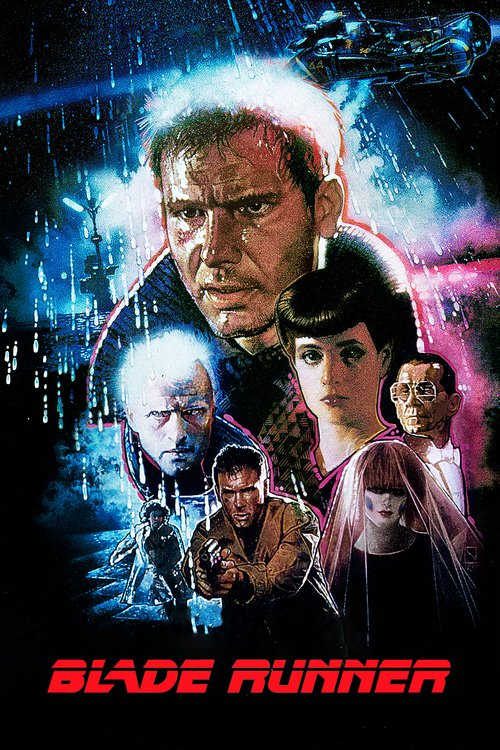


 Thirty years after the events of the first film, a new blade runner, LAPD Officer K (Ryan Gosling), unearths a long-buried secret that has the potential to plunge what's left of society into chaos. K's discovery leads him on a quest to find Rick Deckard (Harrison Ford), a former LAPD blade runner who has been missing for 30 years.
Genres: ['Science Fiction', 'Drama', 'Thriller']


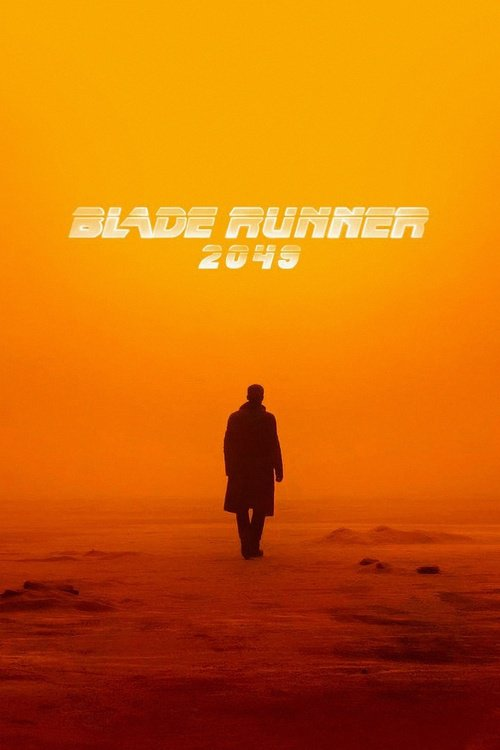


 The definitive three-and-a-half hour documentary about the troubled creation and enduring legacy of the science fiction classic "Blade Runner," culled from 80 interviews and hours of never-before-seen outtakes and lost footage.
Genres: ['Science Fiction', 'Drama', 'Thriller']


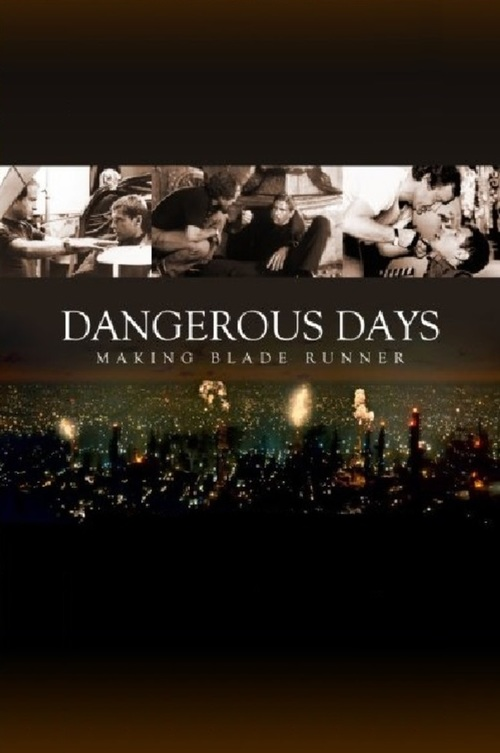


 Trapped on a space station orbiting Earth, a small army of human survivors battle the Undead in order to prevent the destruction of the Earth.
Genres: ['Science Fiction', 'Drama', 'Thriller']


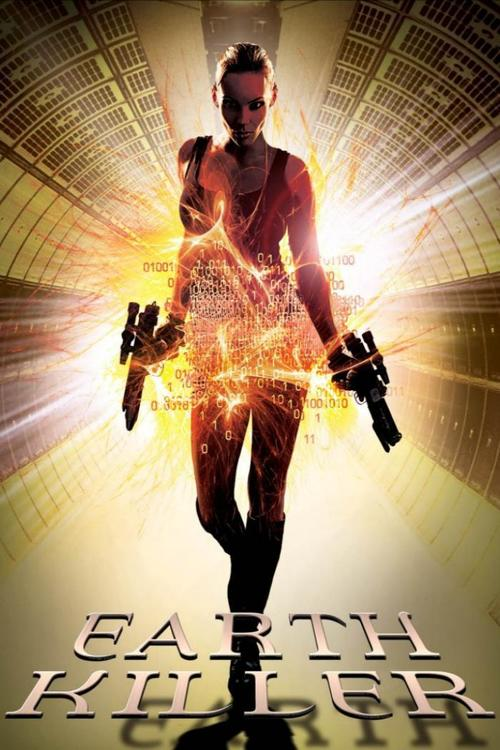


 This is the rare UK Channel 4 documentary about Blade Runner, giving insights into it's history with interviews of Ridley Scott, the writers and nearly all the cast.  Interviews with production staff, including Ridley, give details into the creative process and turmoil during preproduction. Stories from Paul M. Sammon and Fancher provide insight into Philip K. Dick and the origins of Do Androids Dream of Electric Sheep?  Interweaved are cast interviews with the notable exceptions of Harrison Ford and Sean Young. Through these interviews we get a sense of how difficult and frustrating the film was to make as a result of an exacting director without allies and hot, wet, smoggy conditions; which added to the high pressure atmosphere everyone increasingly felt as the film went over budget.  There is also a tour of some locations, most notably the Bradbury Building and the Warner Brothers backlot that was the LA 2019 streets, which look very different from Ridley's dark version.
Genres: [

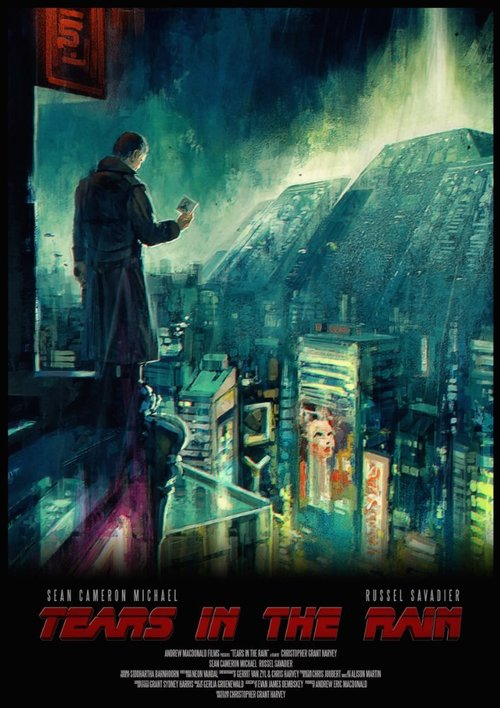

In [160]:
for i in range(0, len(example)):
    print('\n {}'.format(unidecode(example[i]['overview'])))
    genre_string_list = [unidecode(genres[genres['id'] == x]['name'].item()) if genres[genres['id'] == x].shape[0]>0 else 'none' for x in example[0]['genre_ids']]
    print('Genres: {}'.format(genre_string_list))
    if example[i]['poster_path'] is not None:
        poster = "{}{}".format("https://image.tmdb.org/t/p/w500/", example[i]['poster_path'])
        display(Image(poster))